# 영화 리뷰 분류: 이진 분류

## 2종 분류(two-class classification)
2종 분류(two-class classification), 이진 분류(binary classification)는 가장 널리 사용되는 머신러닝 문제중 하나이다.

## IMDB 데이터셋
 - IMDB: 인터넷 영화 데이터베이스(Internet Movie Database)로부터 가져온 데이터셋
 - MNIST 데이터셋처럼 IMDB 데이터셋도 케라스에 포함되어있다.
 - 훈련데이터 2만5000개, 테스트데이터 2만5000개로 구성되어 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있다.
 - 각 데이터는 전처리되어있고 각 리뷰(단어시퀀스)가 숫자 시퀀스로 변환되어있다.(숫자는 인덱스??)
 - 모델이 훈련데이터에서 잘 작동하는 것은 새로운 데이터에서도 잘 작동한다는 것을 보장하지 않는다.
 
## 분류 예제.. 한번 따라해보자..
### IMDB 데이터셋 로드

In [2]:
#keras.datasets모듈에서 imdb객체를 import한다.
from keras.datasets import imdb

#훈련 데이터에서 자주 나오는 단어 1만개만 사용, imdb데이터셋을 로드한다.
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

#당연하지만.. 최대 인덱스는 9999까지다..
max_index = max([max(sequence) for sequence in train_data])
print(max_index)

#
word_index = imdb.get_word_index()#word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]#정수인덱스, 단어 순서로 다시 저장한다.
)
decoded_index = ' '.join(
    # 리뷰를 디코딩한다. 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다.
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

print(train_data[0])
# word_index: (word, index), reverse_index: (index, word)
# for i in range(1, 1000):
#     print(reverse_word_index[i])
print('decoded_index type: {0}'.format(type(decoded_index)))
print(decoded_index)



999
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
decoded_index type: <class 'str'>
? this film was just brilliant casting ? ? story direction ? really ? the part they played 

### 데이터 준비
신경망에 숫자리스트를 주입할 수 없다. 리스트를 텐서로 바꿔서 넣어줘야한다.
리스트를 텐서로 바꾸는 두가지 방법이 있다.
그 중 원핫인코딩(one-hot encoding)방식을 사용해보자

In [3]:
import numpy as np

#results[i]에서 특정인덱스의 위치를 1로 만든다.
# def vectorize_sequences(sequences, dimension=10000):
def vectorize_sequences(sequences, dimension=1000):
    type(sequences)
    results = np.zeros((len(sequences), dimension))
    print('vectorize_sequences(): sequences len, dimension, results len, sequence[0] len : {0}, {1}, {2}, {3}'.format(sequences.shape,\
                                                dimension, results.shape, len(sequences[0])))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(x_test.shape)
print(x_train[0])
# print(x_train.shape)


vectorize_sequences(): sequences len, dimension, results len, sequence[0] len : (25000,), 1000, (25000, 1000), 218
vectorize_sequences(): sequences len, dimension, results len, sequence[0] len : (25000,), 1000, (25000, 1000), 68
(25000, 1000)
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.

## model 정의

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## model 컴파일

In [12]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

## 옵티마이저 설정

In [13]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

## 훈련 검증

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


## 모델 훈련

In [15]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 24000 samples, validate on 1000 samples
Epoch 1/20
24000/24000 [==============================] - 1s 24us/step - loss: 0.5535 - acc: 0.7527 - val_loss: 0.4397 - val_acc: 0.8170
Epoch 2/20
24000/24000 [==============================] - 0s 18us/step - loss: 0.3877 - acc: 0.8396 - val_loss: 0.3712 - val_acc: 0.8450
Epoch 3/20
24000/24000 [==============================] - 0s 20us/step - loss: 0.3356 - acc: 0.8615 - val_loss: 0.3320 - val_acc: 0.8560
Epoch 4/20
24000/24000 [==============================] - 1s 22us/step - loss: 0.3185 - acc: 0.8669 - val_loss: 0.3223 - val_acc: 0.8630
Epoch 5/20
24000/24000 [==============================] - 0s 14us/step - loss: 0.3093 - acc: 0.8715 - val_loss: 0.3158 - val_acc: 0.8630
Epoch 6/20
24000/24000 [==============================] - 0s 15us/step - loss: 0.3051 - acc: 0.8741 - val_loss: 0.3153 - val_acc: 0.8640
Epoch 7/20
24000/24000 [==============================] - 0s 14us/step - loss: 0.2997 - acc: 0.8757 - val_loss: 0.3203 - val_acc:

## 훈련과 검증 손실 그리기

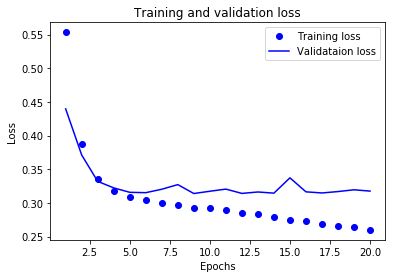

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validataion loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 모델을 처음부터 다시 훈련하기 -> 왜 처음부터 다시 훈련?

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

# 훈련된 모델로 새로운 데이터 예측하기

In [18]:
model.predict(x_test)

array([[0.5344181 ],
       [0.5013015 ],
       [0.35387585],
       ...,
       [0.37417153],
       [0.50244564],
       [0.44745213]], dtype=float32)